In [3]:
!pip install --upgrade scikit-image
!pip install --upgrade imutils

# import the necessary packages
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

SSI Code


SSIM: 0.9388101913918601


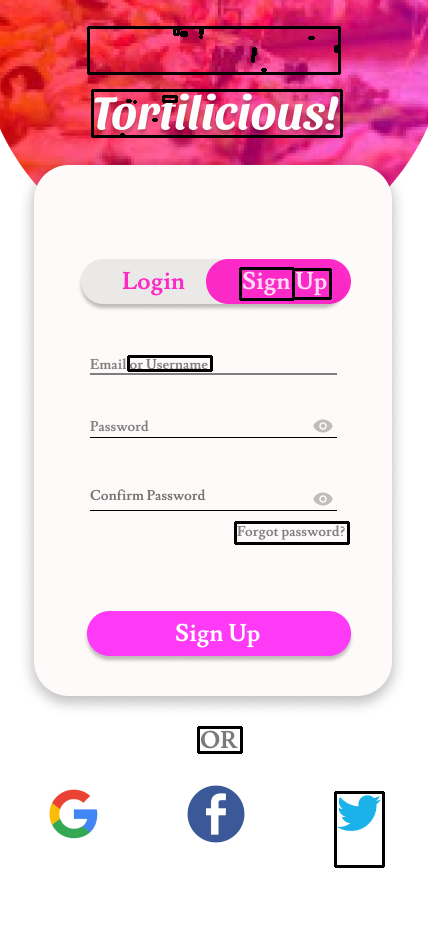

In [4]:
import cv2
import numpy as np

def image_diff(img1, img2, img3):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calculate similarity score
    (score, diff) = compare_ssim(gray1, gray2, full=True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}".format(score))

    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Draw bounding boxes around differing areas
    for c in cnts:
      # compute the bounding box of the contour and then draw the
      # bounding box on both input images to represent where the two
      # images differ
      (x, y, w, h) = cv2.boundingRect(c)
      cv2.rectangle(image3, (x, y), (x + w, y + h), (0, 0, 0), 2)

    return image3

if __name__ == "__main__":
    # Load two images for comparison
    image1 = cv2.imread('/content/input1.png')
    image2 = cv2.imread('/content/input2.png')
    image3=image1

    # Ensure images have the same dimensions
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Get the result and similarity score
    result_image = image_diff(image1, image2, image3)

    # Display the result
    cv2_imshow(result_image)

Pixel-wise difference code


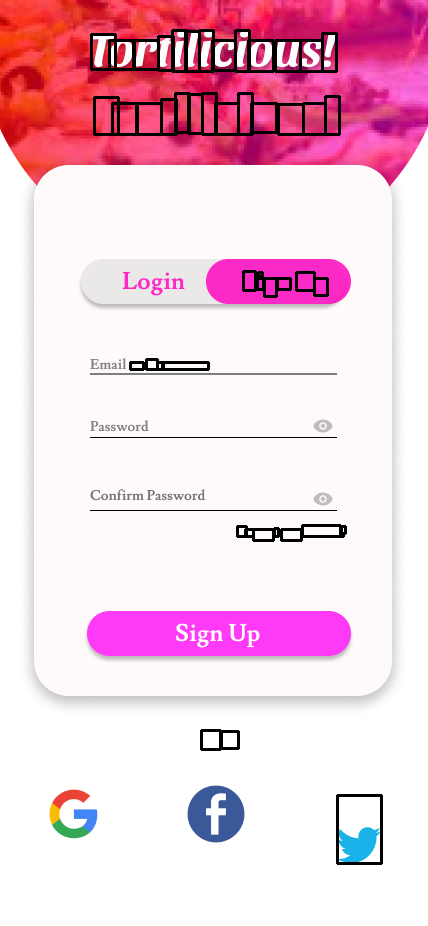

In [14]:
import cv2
import numpy as np

def spot_the_difference(img1, img2, threshold=50):
    # Calculate the absolute pixel-wise difference
    diff = np.abs(img1.astype(np.int32) - img2.astype(np.int32))

    # Convert the difference to a binary mask based on the threshold
    diff_binary = np.sum(diff, axis=-1) > threshold

    # Find connected components in the binary difference image
    contours, _ = cv2.findContours(diff_binary.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

    # Draw bounding boxes around the differences
    diff_img = img2.copy()

    for c in contours:
      # compute the bounding box of the contour and then draw the
      # bounding box on both input images to represent where the two
      # images differ
      (x, y, w, h) = cv2.boundingRect(c)
      cv2.rectangle(diff_img, (x, y), (x + w, y + h), (0, 0, 0), 2)

    return diff_img

if __name__ == "__main__":
    # Load two images for comparison
    image1 = cv2.imread('/content/input1.png')
    image2 = cv2.imread('/content/input2.png')

    # Ensure images have the same dimensions
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Get the difference image with bounding boxes using optimized approach
    difference_image = spot_the_difference(image1, image2)

    # Display the result
    cv2_imshow(difference_image)